### Perimeter Institute Nov 28rd
### 2018 computational physics course
# Exact Diagonalization
 
Guifre Vidal  

# IJulia nb5: sparse diagonalization

In [35]:
using PyPlot
using LinearAlgebra
using Arpack

In [36]:
# Ising model
function buildIsing(theta=pi/4) # Ising model with transverse magnetic field h (critical theta=pi/4 by default)
    X = [0. 1; 1 0]
    Z = [1. 0; 0 -1]
    E = diagm(0=>ones(2))
    XX = kron(X,X)
    HXX = XX
    HZ = kron(Z,E) + kron(E,Z)
    H2 = -(cos(theta)*XX + sin(theta)/2*HZ)
    return H2
end

H2 = buildIsing(pi/4)

4×4 Array{Float64,2}:
 -0.707107  -0.0       -0.0       -0.707107
 -0.0       -0.0       -0.707107  -0.0     
 -0.0       -0.707107  -0.0       -0.0     
 -0.707107  -0.0       -0.0        0.707107

In [37]:
#Let us have a look at the spectrum of H2

theta = pi/4 # critical magnetic field
H2 = buildIsing(theta) # Hamiltonian
D,U = eigen(H2)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
4-element Array{Float64,1}:
 -0.9999999999999993
 -0.7071067811865469
  0.7071067811865476
  1.0               
eigenvectors:
4×4 Array{Float64,2}:
 0.92388    0.0        0.0       -0.382683
 0.0       -0.707107   0.707107   0.0     
 0.0       -0.707107  -0.707107   0.0     
 0.382683   0.0        0.0        0.92388 

In [38]:
# Let us shift the spectrum of H2 so that all eigenvalues are negative 

shiftE = D[end] 
H2 = H2 - shiftE*diagm(0=>ones(4)) # remember to re-shift the energy later on!
D,U = eigen(H2)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
4-element Array{Float64,1}:
 -1.9999999999999993    
 -1.707106781186547     
 -0.2928932188134524    
 -8.836921296448426e-309
eigenvectors:
4×4 Array{Float64,2}:
 -0.92388    0.0        0.0       -0.382683
  0.0       -0.707107   0.707107   0.0     
  0.0       -0.707107  -0.707107   0.0     
 -0.382683   0.0        0.0        0.92388 

### Sparse multiplication

In [39]:
# function for sparse multiplication

function multiplyHPsi(Psi, H2) 
    L = length(Psi)  # Dimension of the vector space
    N = convert(Int64,log2(L))  # Number of spins
    HPsi = zeros(L)
    for n=1:N                              # This multiplies by the Hamiltonian H
        Psi = reshape(Psi,(4,2^(N-2)))
        HPsi = reshape(HPsi,(4,2^(N-2)))
        HPsi += H2*Psi                 
        Psi = reshape(Psi,(2,2^(N-1)))
        HPsi = reshape(HPsi,(2,2^(N-1)))
        Psi = permutedims(Psi,(2,1))
        HPsi = permutedims(HPsi,(2,1))
    end
    Psi = reshape(Psi,L)
    HPsi = reshape(HPsi, L)
    return HPsi
end

multiplyHPsi (generic function with 1 method)

### Initialize Psi for N spins

In [40]:
N=20 #  N = 20    t < 0.5s 
Psi = randn(2^N)

# Normalize Psi
Psi = Psi/sqrt(abs(Psi'*Psi))

@time multiplyHPsi(Psi,H2)

init_steps = 1
energy = ones(0)
initial_step=1
Nsteps = 0
;

  0.456756 seconds (67.88 k allocations: 651.300 MiB, 36.36% gc time)


### Apply power method to Psi

In [41]:
# Use this to start or continue to apply power method 

initial_step += Nsteps
Nsteps = 20
final_step = initial_step + Nsteps-1

for n=initial_step:final_step
    HPsi = multiplyHPsi(Psi,H2)
    newenergy = real(Psi'*HPsi) + shiftE*N
    energy = [energy; newenergy]
    Psi = HPsi/sqrt(abs(HPsi'*HPsi))
    print(n-initial_step+1, ":", Nsteps, " ")
end

1:20 2:20 3:20 4:20 5:20 6:20 7:20 8:20 9:20 10:20 11:20 12:20 13:20 14:20 15:20 16:20 17:20 18:20 19:20 20:20 

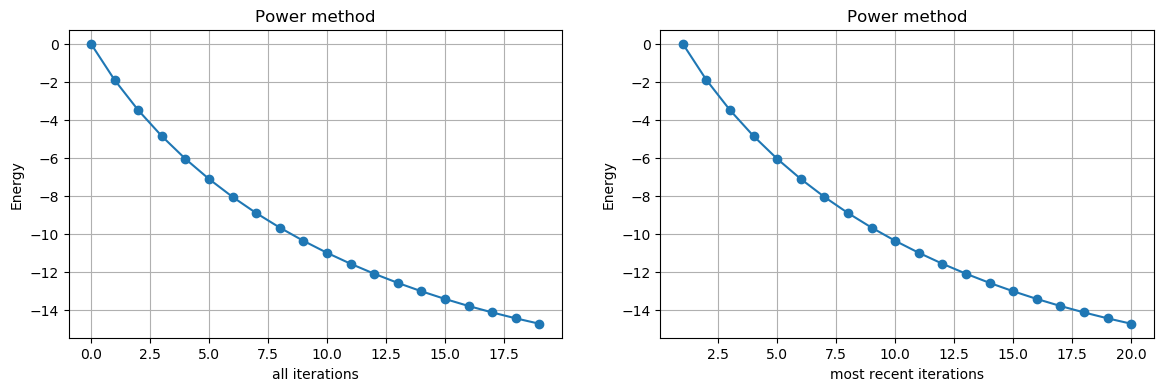

In [42]:
figure("Power_method",figsize=(14,4))

subplot(121) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Power method")
ax = gca()
xlabel("all iterations")
ylabel("Energy")
plot(energy, marker = "o")

subplot(122) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Power method")
ax = gca()
xlabel("most recent iterations")
ylabel("Energy")
plot(initial_step:final_step, energy[initial_step:final_step], marker = "o");

### Exercise (1/2): For $N=20$ spins, compute the lowest energy with momentum $k=n 2\pi/N$ for $n=0,2, \cdots, N-1$

### Exercise (1/2): For $N=20$ spins, compute first excited state with mementum $k=0$ 